# Modelo de Black-Scholes - Derivativos

# Parte 1: entradas de valores

### Importar Pacotes

In [11]:
import pandas as pd
import numpy as np
import yfinance as yf
from scipy.stats import norm

### Série Histórica do Ativo

In [2]:
inicio = "2019-12-31" # trocar
fim = pd.to_datetime("today") # data atual (retorna o dia de hoje, mas pode ser uma data qualquer)
ativo = "BBDC4.SA"

In [3]:
dados = yf.download(start = inicio, end = fim, tickers = ativo)
dados["retorno"] = dados["Adj Close"].pct_change()
dados.dropna(inplace = True)

[*********************100%***********************]  1 of 1 completed


### Características da Opção

In [4]:
nome = "BBDCB234" # alterar
r = 0.0915 # taxa livre de risco - alterar
S = dados.iloc[len(dados)-1]["Adj Close"] # preço spot
X = 23.17 # strike da opção - alterar
dt = 13 # dias úteis até o vencimento - alterar
C0 = 0.48 # preço atual da opção - alterar

# Parte 2: modelagem

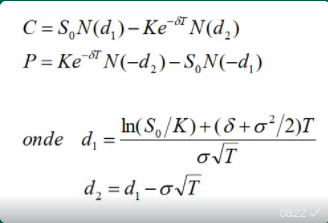

### Calcula desvio-padrão amostral

In [6]:
df = dados[["Adj Close", "retorno"]]
s = df["retorno"].std()

### Calcula d1 e d2

In [108]:
d1 = ((np.log(S/X)) + (((np.exp(r/252)-1) + (s**2/2))*dt)) / (s*np.sqrt(dt))
d2 = d1 - (s*np.sqrt(dt))

### Fórmula para call

In [109]:
C = (S*norm.cdf(d1)) - (X*np.exp(-r/252*dt)*norm.cdf(d2))

0.9015539230953991

### Fórmula para put

In [110]:
P = (X*np.exp(-r/252*dt)*norm.cdf(-d2)) - (S*norm.cdf(-d1))

1.032443416903746

### Resultado

In [111]:
pd.DataFrame({"Variável" : ["Ticker da Opção",
                            "Preço Spot do Ativo",
                            "Strike da Opção",
                            "Dias-úteis até o vencimento",
                            "Taxa Livre de Risco",
                            "Preço Atual da Opção",
                            "Preço Alvo da Opção de Compra",
                            "Preço Alvo da Opção de Venda"],
              "Valor" : [nome,
                         "R$ {:2.2f}".format(S),
                         "R$ {:2.2f}".format(X),
                         str(dt),
                         "{:.2%}".format(r),
                         "R$ {:5.2f}".format(C0),
                         "R$ {:5.2f}".format(C),
                         "R$ {:5.2f}".format(P)]})

,Variável,Valor
0,Ticker da Opção,BBDCB234
1,Preço Spot do Ativo,R$ 22.93
2,Strike da Opção,R$ 23.17
3,Dias-úteis até o vencimento,13
4,Taxa Livre de Risco,9.15%
5,Preço Atual da Opção,R$ 0.48
6,Preço Alvo da Opção de Compra,R$ 0.90
7,Preço Alvo da Opção de Venda,R$ 1.03


# Parte 3: Gregas